# Unsupervised Learning 

# 1.0 Clustering - Application to a real-world problem 

    [Using hierarchical clustering to understand lung cancer](http://www.pnas.org/content/98/24/13790#F3)

Knowing what type of lung cancer a patient has can be challenging. In one study, experts agreed only 41% of the time! [1]. This is probably because human experts can't analyse 12,600 gene transcript sequences in 186 lung tumor samples just by themselves. This is where machine learning can help. Using unsupervised clustering, can you analyse the genetic profiles lung cancer patients to pinpoint markers of certain substypes of cancer? [2]

[1] (Sorensen J B, Hirsch F R, Gazdar A, Olsen J E(1993) Cancer 71:2971–2976, pmid:8387872.  
[2] https://www.ncbi.nlm.nih.gov/pubmed/11707567

# 1.1 Run hierarchical clustering on the dataset 

Get the data from [here](pubs.broadinstitute.org/mpr/projects/LUNG/DatasetB_675gene.txt.gz)

In [56]:
import pandas as pd 
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
import scipy.spatial.distance as dist 

from pylab import rcParams
import seaborn as sns 
import matplotlib.pyplot as plt 

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm 

In [48]:
df = pd.read_csv('data/interim/DatasetB_675gene.csv', index_col='gene')
df.head()

,AD043,AD111,AD114,AD115,AD118,AD119,AD120,AD122,AD123,AD127,...,NL279,NL3104,NL3681,NL4083,NL4353,NL504,NL6084,NL6853,NL6943,NL7530
gene,,,,,,,,,,,,,,,,,,,,,
"signal transducer and activator of transcription 1, 91kD",193.19,369.52,169.81,305.46,413.63,195.14,507.755,296.14,455.065,615.85,...,362.77,188.70,156.09,250.08,160.10,212.84,246.74,161.45,154.51,198.65
glyceraldehyde-3-phosphate dehydrogenase,2565.55,2362.42,1861.83,2340.89,2317.04,1775.37,2052.360,2467.85,2995.280,2074.51,...,1804.46,774.95,1185.67,1161.04,921.30,2462.27,916.89,930.33,1559.22,1111.39
glyceraldehyde-3-phosphate dehydrogenase,3361.85,3262.46,2967.65,3473.33,3340.84,2536.74,3186.560,3753.37,4116.590,3085.19,...,2578.14,1522.94,2286.45,2160.54,1818.58,3219.49,2440.02,1609.02,2361.19,2050.42
ribosomal protein L28,3810.86,2616.13,2563.59,2876.46,3354.31,3449.94,3344.000,3299.65,3066.460,2725.63,...,3123.36,3171.78,3070.95,3079.19,3013.06,3298.57,3233.64,2938.96,2858.82,3844.74
trefoil factor 3 (intestinal),2975.29,28.23,41.46,2201.87,4.09,87.57,601.745,1885.56,15.745,123.50,...,40.60,47.05,43.66,90.05,111.34,2.45,119.21,64.48,1.00,21.34


In [49]:
df.shape

(675, 156)

In [50]:
df = np.asarray(df)
df.shape

(675, 156)

In [57]:
distMatrix = dist.pdist(df)

In [58]:
distSquareMatrix = dist.squareform(distMatrix)

In [59]:
linkageMatrix = linkage(distSquareMatrix)

/Users/nus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [84]:
linkageMatrix.shape

(674, 4)

In [63]:
leaves = dendro['leaves']

In [66]:
transformedData = df[leaves,:]
transformedData

array([[1609.47, 6569.86, 5273.47, ..., 2760.57, 2572.2 , 6353.19],
       [4182.14, 4389.94, 4743.8 , ..., 4987.39, 4974.37, 6179.45],
       [4196.25, 6207.61, 6858.12, ..., 1402.91,  947.9 , 2316.53],
       ...,
       [  63.2 ,  965.47, 2940.51, ..., 7589.39, 8405.11, 7175.46],
       [3036.53, 4562.19, 5120.39, ..., 1434.83, 1409.36, 3861.48],
       [4261.15, 3910.93, 3264.08, ..., 4538.78, 4367.32, 3897.2 ]])

# 1.2 Visualise the clusters 

/Users/nus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.
/Users/nus/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


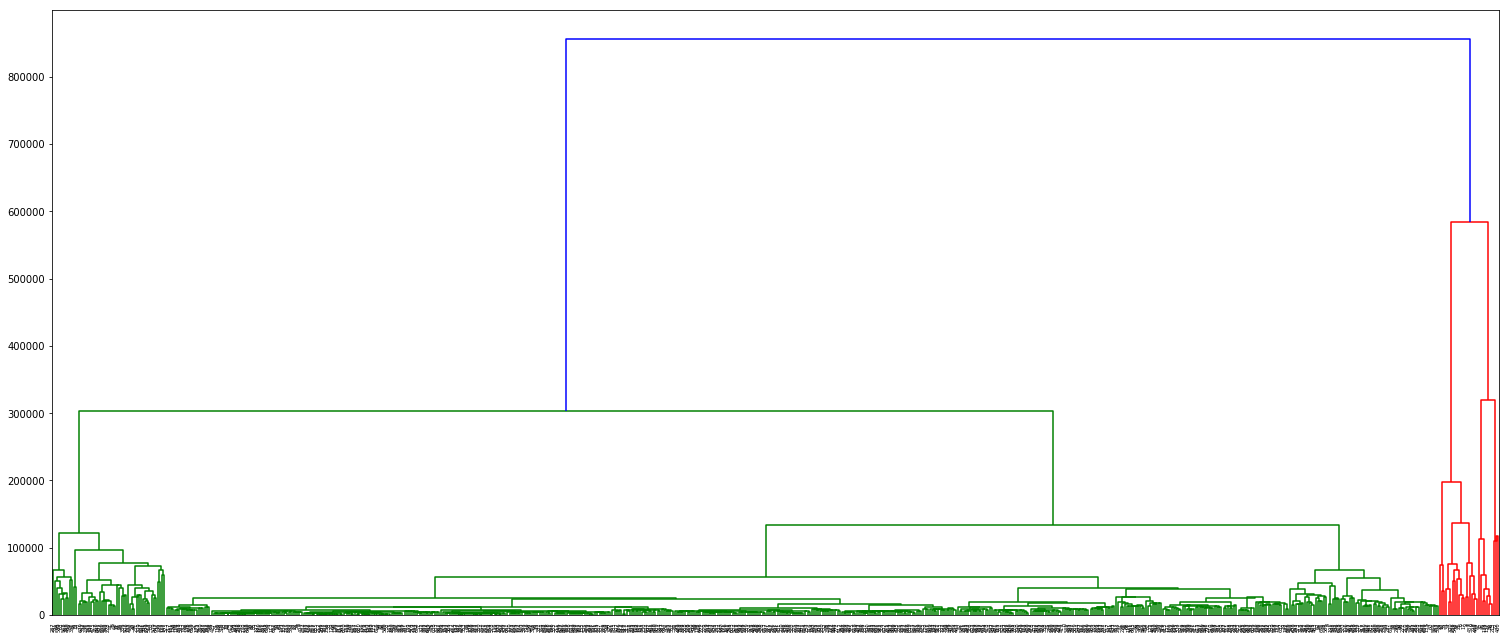

In [82]:
# plot dendrogram 
fig = pylab.figure()
axdendro = fig.add_axes([0.09, 0.1,0.2,0.8])
Y = linkage(distSquareMatrix, method='centroid')
Z = dendrogram(Y, orientation='top')

# plot distance matrix 
# axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
# index = Z['leaves']
# D = distSquareMatrix[index,:]
# D = distSquareMatrix[:,index]
# im = axmatrix.matshow(D, aspect='auto', origin='lower')
# axmatrix.set_xticks([])
# axmatrix.set_yticks([])

# Plot colorbar.
#axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
#pylab.colorbar(im, cax=axcolor)

# Display and save figure.
fig.set_size_inches(100.5, 10.5)
fig.show()
fig.savefig('dendrogram.png')

# 1.3 Interpret the clusters
![clustering for adenocarcinoma subclasses](F1.large.jpg)

# 1.4 Validate the clusters 

open-ended question for research? what are some heuristics we might want to use to evaluate the quality of our clusters? 

![clustering for adenocarcinoma subclasses](F2.large.jpg)

In [ ]:
# Futther uses of the dataset 
# using the data to predict disease outcomes 

# [2 Clustering - a more complex approach](http://stke.sciencemag.org/content/9/432/re6)

- some pitfalls: 
    - high-dimensional data means that:
    underlying structure difficult to visualise, 
    valid but confliting clusters found in subsets of the data 
    many interactions in a complex system, in addition to meaningless relationships found by chance 
    - did not cross-validate results with results from other clustering algorithms
    
- some recommendations: 
    - applying cluster validation methods
    - determine statistical and biological significance
    - account for noise 
    - evaluate multiple clustering solutions
    

# 2.1 The effect of high dimensionality on clustering

In [1]:
# PCA does not capture clusters of cell lines 

In [2]:
# however selection of one 10 dimensional subspace does 

# 2.2 The effect of parameters on clustering
- transformation, distance metric or algorithm used can drastically alter the clustering result 
![effect of algorithm on clustering results](F4.large.jpg)

# (VIII) Clustering from scratch 

In [ ]:
# expectation maximisation 